In [7]:
# 데이터로드
from keras.datasets import cifar10
(x_train, y_train),(x_test,y_test) = cifar10.load_data()  # (50000, 32, 32, 3) -> 32x32 rgb 그림이 5만장 있다.

In [8]:
x_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

[3]


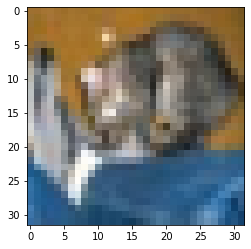

In [9]:
import matplotlib.pyplot as plt
print(y_test[0])
plt.imshow(x_test[0])

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
y_train.shape

(50000, 10)

In [10]:
# 전처리
# x는 표준화
# x_train = x_train/99
# x_test = x_test/99 이건 대체 왜한거야?
# y는 원핫 인코딩
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [19]:
from keras.layers import Dense, LSTM, Conv2D, Dropout, MaxPool2D, Flatten

model = Sequential()
model.add(Conv2D(16, (2,2), input_shape=(32,32,3), padding='same'))
model.add(Conv2D(16, kernel_size = (5,5), padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Conv2D(32, kernel_size = (5,5), padding = 'same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# model.add(Conv2D(32, (2,2), padding='same',activation ='relu'))
# model.add(Conv2D(32, (2,2), padding='same',activation ='relu'))
# model.add(MaxPooling2D(2,2)) 
# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 16)        6416      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 32)        25632     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 32)         

In [20]:
# 설명과 훈련
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop = EarlyStopping(monitor='loss', patience=50, mode='auto')
path = './model/{epoch:02d}-{loss:.4f}.hdf5'
checkpoint = ModelCheckpoint(filepath=path, monitor='val_loss',save_best_only=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
hist = model.fit(x_train,y_train, epochs=50, batch_size=1000, validation_split=0.2
                ,callbacks=[early_stop, checkpoint])

loss, acc = model.evaluate(x_test,y_test) 
print('loss 는',loss)
print('acc 는',acc)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 3s 66us/step - loss: 5.4183 - acc: 0.1042 - val_loss: 2.3011 - val_acc: 0.1040
Epoch 2/50
40000/40000 [==============================] - 2s 48us/step - loss: 2.2825 - acc: 0.1303 - val_loss: 2.2152 - val_acc: 0.1881
Epoch 3/50
40000/40000 [==============================] - 2s 48us/step - loss: 2.1692 - acc: 0.1938 - val_loss: 2.0814 - val_acc: 0.2642
Epoch 4/50
40000/40000 [==============================] - 2s 48us/step - loss: 2.0695 - acc: 0.2484 - val_loss: 1.9522 - val_acc: 0.3157
Epoch 5/50
40000/40000 [==============================] - 2s 48us/step - loss: 1.9487 - acc: 0.3003 - val_loss: 1.8570 - val_acc: 0.3566
Epoch 6/50
40000/40000 [==============================] - 2s 49us/step - loss: 1.8557 - acc: 0.3359 - val_loss: 1.7637 - val_acc: 0.3816
Epoch 7/50
40000/40000 [==============================] - 2s 49us/step - loss: 1.7991 - acc: 0.3595 - val_loss: 1.7117 - val_acc

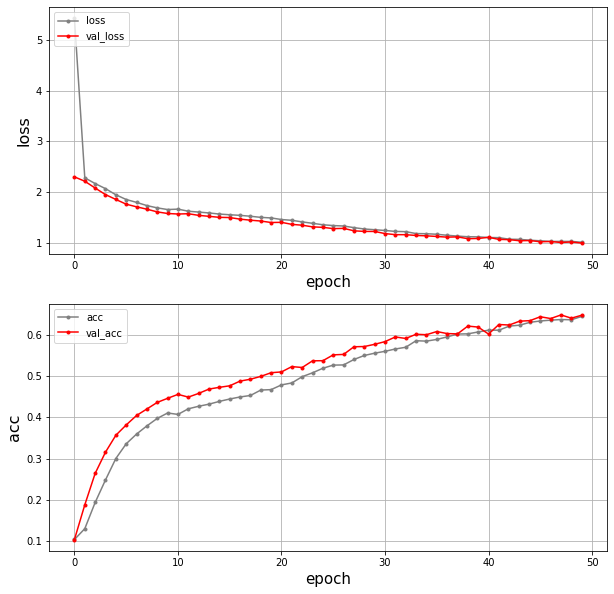

In [21]:
# 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(2,1,1) # 2행 1열 에 첫번째꺼 그리겠다
plt.plot(hist.history['loss'], marker='.', c='gray', label='loss')
plt.plot(hist.history['val_loss'], marker='.', c='red', label='val_loss')
plt.grid()
plt.xlabel('epoch', size=15)
plt.ylabel('loss', size=16)
plt.legend(loc='upper left')

plt.subplot(2,1,2) # 2행 1열 에 두번째꺼 그리겠다
plt.plot(hist.history['acc'], marker='.', c='gray', label='acc')  
plt.plot(hist.history['val_acc'], marker='.', c='red', label='val_acc')
plt.grid()
plt.xlabel('epoch', size=15)
plt.ylabel('acc', size=16)
plt.legend(loc='upper left')
plt.show()

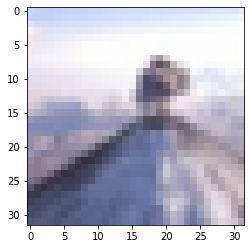

In [8]:
plt.imshow(x_test[0])

In [9]:
import numpy as np

In [10]:
np.argmax(y_test, axis=1)

array([49, 33, 72, ..., 51, 42, 70], dtype=int64)

In [11]:
predict = model.predict(x_test)

In [12]:
np.argmax(predict, axis=1)  # 33퍼 맞니..? 성능 왜이래...? ㅠ

array([79, 80, 73, ..., 44, 78, 92], dtype=int64)

In [14]:
from keras.models import load_model
model = load_model('./model/22-0.3191.hdf5')

In [16]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 15)        1140      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 320)       120320    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 320)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 320)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 81920)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               8192

In [20]:
import numpy as np
y = np.array([1,2,3,4,5,1,2,3,4,5])

from keras.utils import np_utils
y = np_utils.to_categorical(y)
y = y[:,1:] 
y 

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [24]:
from sklearn.preprocessing import OneHotEncoder
y = np.array([1,2,3,4,5,1,2,3,4,5])
y = y.reshape(10,1)
onehot = OneHotEncoder()
onehot.fit(y)
y = onehot.transform(y).toarray()
y

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])